In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dumpLibrary as dl
from numpy import fft
import pandas as pd
from sklearn.utils import shuffle
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [2]:
Data = np.loadtxt('TimeData.txt')

In [3]:
Data.shape

(681, 8192)

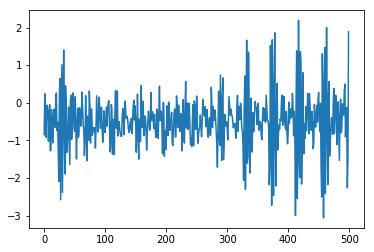

In [4]:
plt.plot(Data[0][:500])  #First measurement
plt.show()

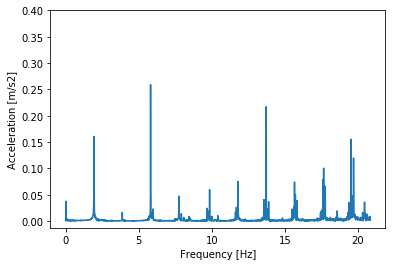

In [5]:
#Fast Fourier Transform
Data_freq = abs(fft.fft(Data)[:][:4096])/4096
rpm = 600
plt.plot(np.arange(2048)*25000/(4096*rpm),Data_freq[150][:2048])
plt.ylim(ymax=0.4)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Acceleration [m/s2]')

plt.show()


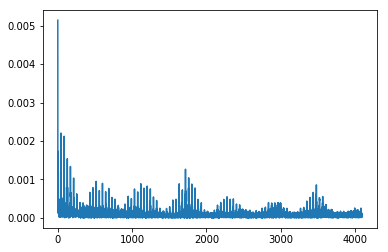

In [6]:
#Hilbert Transform
envelope = abs(dl.hilbert_transform(Data_freq,'freq'))

plt.plot(envelope[0][:4096])  #First measurement
plt.show()

In [7]:
#Generating features
parameters_freq = np.asmatrix(dl.generate_features(Data_freq))
parameters_time = np.asmatrix(dl.generate_features(envelope))

In [8]:
parameters_freq.shape
parameters_time.shape

(681, 9)

In [9]:
k = np.zeros([len(Data),19])
k[:,:9] = parameters_time
k[:,9:-1] = parameters_freq

In [10]:
# Normalization
for i in range (18):
	k[:,i] *= 1/np.max(k[:,i])

In [11]:
# Type of Fault
k[:105,-1]=0
k[106:226,-1]=2
k[227:332,-1]=1
k[333:453,-1]=3
k[454:559,-1]=1
k[560:679,-1]=3

In [12]:
k.shape

(681, 19)

In [13]:
# FFT || Hilbert Transform
feature_vector = pd.DataFrame(k, columns=['Crest Factor', 'Shape Factor', 'Mean','Square Root','Kurtosis','Variance',
                                          'Clearance','Impulse Indicator','Skewness Factor','Crest Factor', 'Shape Factor',
                                          'Mean','Square Root','Kurtosis','Variance','Clearance','Impulse Indicator',
                                          'Skewness Factor','Type of Fault'])
feature_vector.head()

,Crest Factor,Shape Factor,Mean,Square Root,Kurtosis,Variance,Clearance,Impulse Indicator,Skewness Factor,Crest Factor,Shape Factor,Mean,Square Root,Kurtosis,Variance,Clearance,Impulse Indicator,Skewness Factor,Type of Fault
0,0.332398,0.162330,0.298130,0.302889,0.003443,0.087728,0.052361,0.332398,0.022962,0.164240,0.165967,0.229902,0.174252,0.004027,0.087728,0.024444,0.164240,0.019659,0.0
1,0.341470,0.158822,0.288509,0.288443,0.003435,0.086778,0.055583,0.341470,0.023171,0.163404,0.164581,0.228555,0.170650,0.003700,0.086778,0.024463,0.163404,0.018608,0.0
2,0.334465,0.153987,0.282132,0.283447,0.002964,0.083419,0.055674,0.334465,0.021386,0.167699,0.157926,0.218918,0.161222,0.003534,0.083419,0.026211,0.167699,0.017892,0.0
3,0.338160,0.150951,0.279688,0.282906,0.002953,0.080863,0.056781,0.338160,0.020884,0.168190,0.155665,0.219419,0.162063,0.003391,0.080863,0.026228,0.168190,0.017147,0.0
4,0.346483,0.155873,0.283624,0.283820,0.003393,0.085026,0.057371,0.346483,0.022894,0.158161,0.162707,0.227984,0.173427,0.003400,0.085026,0.023737,0.158161,0.017754,0.0


In [14]:
fv = shuffle(feature_vector)
X = fv.iloc[:,:-1]
y = fv.iloc[:,-1]

In [15]:
proportion = 0.8
n_train = int(np.floor(len(X)*proportion))
X_train = X[:n_train]
X_test = X[n_train:]
y_train = y[:n_train]
y_test = y[n_train:]

In [16]:
X = X_train
Y = y_train

In [20]:
# Classifiers
# using the default values for all the hyperparameters
clf_tree = tree.DecisionTreeClassifier()
clf_svm = SVC()
clf_perceptron = Perceptron()
clf_knn = KNeighborsClassifier()
clf_rf = RandomForestClassifier()
clf_gBoost = GradientBoostingClassifier()

# Training the models
clf_tree.fit(X, Y)
clf_svm.fit(X, Y)
clf_perceptron.fit(X, Y)
clf_knn.fit(X, Y)
clf_rf.fit(X,Y)
clf_gBoost.fit(X,Y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [21]:
# Testing using the same data
pred_tree = clf_tree.predict(X_test)
acc_tree = accuracy_score(y_test, pred_tree) * 100
print('Accuracy for DecisionTree: {}'.format(acc_tree))

pred_svm = clf_svm.predict(X_test)
acc_svm = accuracy_score(y_test, pred_svm) * 100
print('Accuracy for SVM: {}'.format(acc_svm))

pred_per = clf_perceptron.predict(X_test)
acc_per = accuracy_score(y_test, pred_per) * 100
print('Accuracy for Perceptron: {}'.format(acc_per))

pred_knn = clf_knn.predict(X_test)
acc_knn = accuracy_score(y_test, pred_knn) * 100
print('Accuracy for KNN: {}'.format(acc_knn))

pred_rf = clf_rf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf) * 100
print('Accuracy for Random Forest: {}'.format(acc_rf))

pred_gb = clf_gBoost.predict(X_test)
acc_gb = accuracy_score(y_test, pred_gb) * 100
print('Accuracy for Gradient Boosting: {}'.format(acc_gb))

Accuracy for DecisionTree: 91.24087591240875
Accuracy for SVM: 51.82481751824818
Accuracy for Perceptron: 48.9051094890511
Accuracy for KNN: 91.97080291970804
Accuracy for Random Forest: 92.7007299270073
Accuracy for Gradient Boosting: 94.8905109489051


In [22]:
# The best classifier from svm, per, KNN
index = np.argmax([acc_tree, acc_svm, acc_per, acc_knn, acc_rf, acc_gb])
accs = {0: 'Decision Tree', 1: 'SVM', 2: 'Perceptron', 3: 'KNN', 4: 'Random Forest', 5: 'Gradient Boosting'}
print('Best gender classifier is {}'.format(accs[index]))

Best gender classifier is Gradient Boosting


In [23]:
#Indicators
precs = [pred_tree, pred_svm, pred_per, pred_knn, pred_rf, pred_gb]
prf = precision_recall_fscore_support(y_test, precs[index], average=None)
indicators = pd.DataFrame(list(prf), index=['precision','recall','fscore','support'])
print(indicators.T)

   precision    recall    fscore  support
0   0.947368  0.782609  0.857143     23.0
1   0.979167  1.000000  0.989474     47.0
2   0.848485  0.965517  0.903226     29.0
3   1.000000  0.973684  0.986667     38.0


In [28]:
#Cross Validation
from sklearn.model_selection import cross_val_score
clfs = [clf_tree, clf_svm, clf_perceptron, clf_knn, clf_rf, clf_gBoost]
scores = cross_val_score(clfs[index], X, Y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.93 (+/- 0.06)
